# Mental Health in Tech Survey

OSMI Mental Health in Tech Survey 
survey aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.

How Will This Data Be Used?
The Open Sourcing Mental Illness team of volunteers will use this data to drive work in raising awareness and improving conditions for those with mental health disorders in the IT workplace.
   1. how mental health is viewed within the tech/IT workplace, 
   2. Prevalence of certain mental health disorders within the tech industry. 

This survey data has the details who suffer from mental health disorders (diagnose or un-diagnosed by medical) 
This notebook will help companies to provide support their employee who wants to get mental health treatment.

In [1]:
# import lib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

## Columns 
* Timestamp
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments: Any additional notes or comments

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

- total No of 26 columns.
- only age colum is int datatype rest string datatype 

## EDA
 ---

- column 'work_interfere' and 'self_employed' has the null values 
- need to fix those columns 

In [6]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' nan]


In [8]:
df['work_interfere'] = df['work_interfere'].fillna('unknown')
print(df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' 'unknown']


In [9]:
print(df['self_employed'].unique())

[nan 'Yes' 'No']


In [10]:
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['No' 'Yes']


## Treatment Columns: Target Data
---


Yes    637
No     622
Name: treatment, dtype: int64

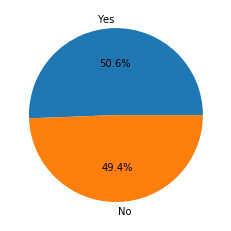

In [11]:
plt.pie(df['treatment'].value_counts(),labels=df['treatment'].unique(), autopct='%1.1f%%',)
df['treatment'].value_counts()

- No issue of unbiased dataset

### Age Column:
---

- Some of the values of age are negative and some are very high number like 9999,1000
- Those values will be droped 

In [12]:
print("The dataset contains different age groups including: \n")
print(df['Age'].unique())

The dataset contains different age groups including: 

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [13]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72],
      dtype=int64)

Text(0.5, 0, 'Age')

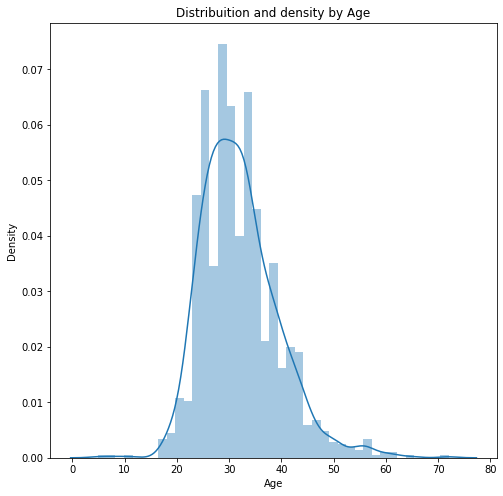

In [14]:
# Distribiution and density by Age
plt.figure(figsize=(8,8))
sns.distplot(df["Age"])
plt.title("Distribuition and density by Age")
plt.xlabel("Age")

### Country Column:
---

- most of the countries have only one respondents. which is difficult to analyse which country is facing highest metal health strees issue
- This columns don't make sense for this dataset
- drop the country column

In [15]:
print(df['Country'].value_counts())

United States             748
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Sweden                      7
Poland                      7
Italy                       7
Switzerland                 7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Austria                     3
Mexico                      3
Finland                     3
Colombia                    2
Portugal                    2
Greece                      2
Denmark                     2
Croatia                     2
Hungary                     1
Czech Republic              1
Romania                     1
Thailand                    1
Philippine

### State Column:
---

- This data set has only states from US are and from other countried its 'nan'
- so drop this column

In [16]:
print(df['state'].unique())

['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


#### drop the columns
---

- Going to drop the Timestamp', 'Country', 'state', column

In [17]:
df.drop(columns=['Timestamp', 'Country', 'state'], inplace = True)

In [18]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_val = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_val)

                           Total   Percent
comments                    1091  0.870016
obs_consequence                0  0.000000
Gender                         0  0.000000
self_employed                  0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
work_interfere                 0  0.000000
no_employees                   0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
benefits                       0  0.000000
care_options                   0  0.000000
wellness_program               0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
coworkers                      0  0.000000
supervisor                     0  0.000000
mental_health_interview        0  0.000000
phys_health_interview          0  0.000000
mental_vs_p

### Gender Column:
---

- Male, or cis Male, male can all be named as male.
- Female, or cis Female,can all be named as female.
- Other to  cisgender. Lesbian, gay, bisexual, and transgender people may all identify with the word other

In [19]:
print('Gender notations:')
print(df['Gender'].unique())

Gender notations:
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [20]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      988
Female    247
Other      19
Name: Gender, dtype: int64

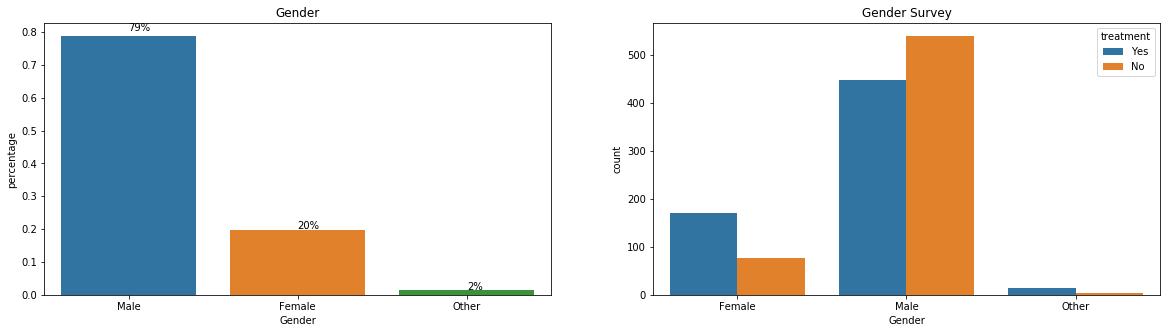

In [21]:
# Plot 
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
percentage = df['Gender'].value_counts(normalize = True).rename_axis('Gender').reset_index(name = 'percentage')
ax = sns.barplot(x = 'Gender', y = 'percentage', data = percentage)
for a in ax.patches:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02))
plt.title('Gender')
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['treatment'])
plt.title('Gender Survey')
plt.show()

- males dataset are 4 times the number of females.
- Almost 79% of respondents are male, Number of males in the tech industry are much more as compared to the number of females
- Thus, we can not conculed that males are more susceptible to mental health issues etc
- female that want to get treatment is high compared to men.
- other is only 2 % very low,this show a significant difference in the count of who wants the treatments, and  mental health problems are serious too.

### Family_History Column:
---


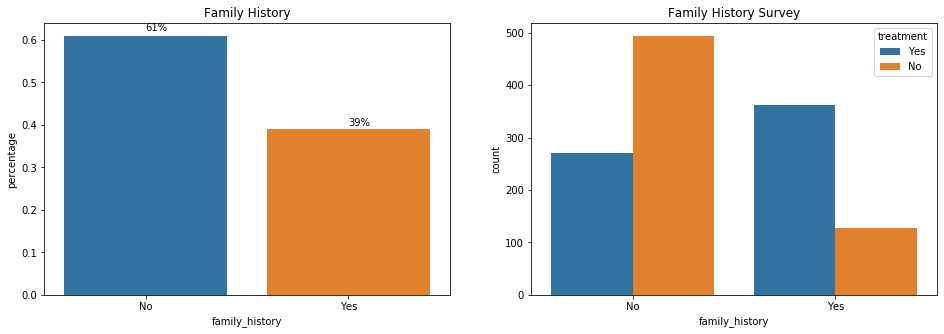

In [22]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
percentage = df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'percentage')
ax = sns.barplot(x = 'family_history', y = 'percentage', data = percentage)
for a in ax.patches:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02))
plt.title('Family History')

plt.subplot(1,2,2)
sns.countplot(df['family_history'], hue = df['treatment'])
plt.title('Family History Survey')
plt.show()

**family history of mental illness**.
- From 39% of respondents who say that they have a family history of mental illness. 
- plot show treatment is prefreed more by family with mental illness than without a family history.

### Remote Work Column:
---

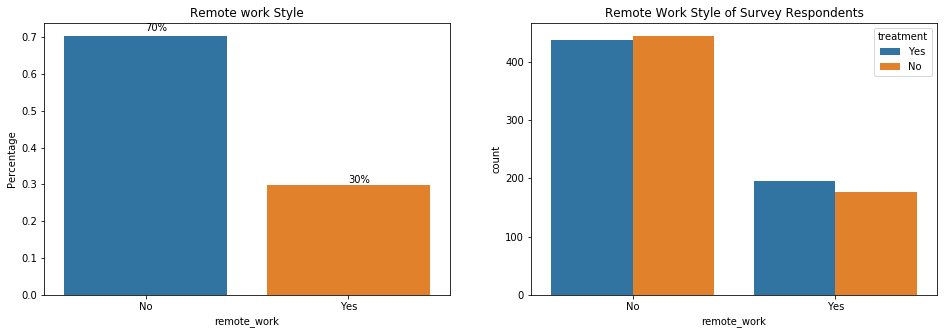

In [23]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = percentage)
for a in ax.patches:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02))
plt.title('Remote work Style')

plt.subplot(1,2,2)
sns.countplot(df['remote_work'], hue = df['treatment'])
plt.title('Remote Work Style of Survey Respondents')
plt.show()

**Remote Work**
- 70% of respondented don't work remotely, 
- Result most of the metal health issue come from the workplace.

### work_interfere
----

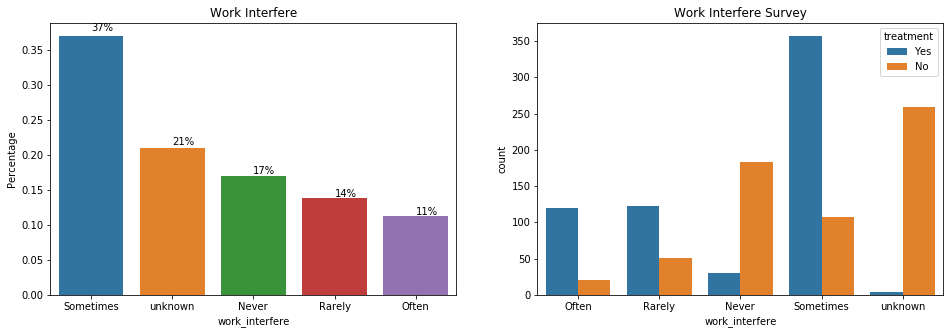

In [24]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = percentage)
for a in ax.patches:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02))

plt.title('Work Interfere')
plt.subplot(1,2,2)
sns.countplot(df['work_interfere'], hue = df['treatment'])
plt.title('Work Interfere Survey')
plt.show()

**How mental illness affect the work interferes**
- About 37% of respondents have sometimes experienced interference at work 
- About 14% of respondents have rarely experienced interference at work
- About 11% of respondents have often experienced interference at work
- most of them prefred to get treatment 
- about 17% respondents have never experience work interference but still wants to have get health treatment

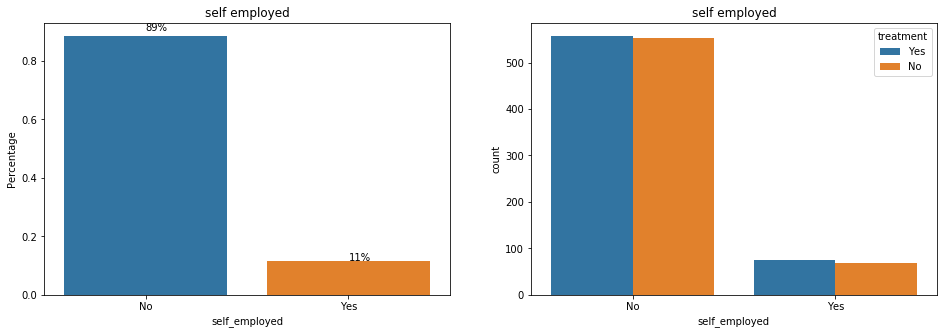

In [25]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = percentage)
for a in ax.patches:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02))

plt.title('self employed')
plt.subplot(1,2,2)
sns.countplot(df['self_employed'], hue = df['treatment'])
plt.title('self employed')
plt.show()

**Are the people self employed**
- only 11% are self employed rest 89% are employed 


### coworkers:
---

Some of them    772
No              258
Yes             224
Name: coworkers, dtype: int64

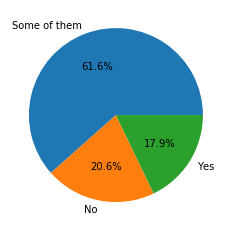

In [26]:
plt.pie(df['coworkers'].value_counts(),labels=df['coworkers'].unique(), autopct='%1.1f%%',)
df['coworkers'].value_counts()

-  on 18% people prefer to share about their mental health with their coworkers
- and 61% only sometime only share

### tech company
---

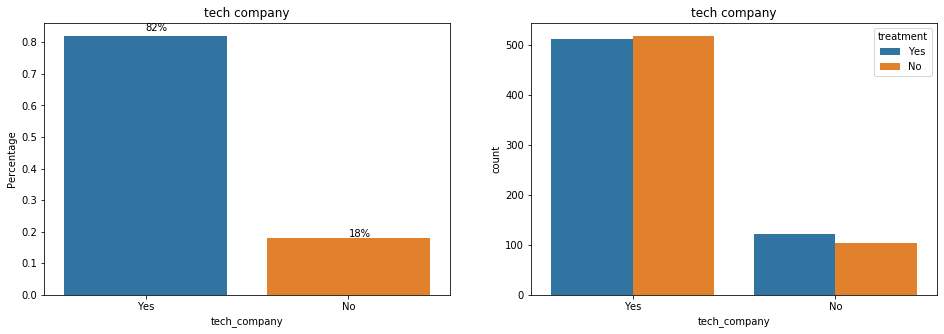

In [27]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
percentage = df['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = percentage)
for a in ax.patches:
    width = a.get_width()
    height = a.get_height()
    x, y = a.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02))

plt.title('tech company')
plt.subplot(1,2,2)
sns.countplot(df['tech_company'], hue = df['treatment'])
plt.title('tech company')
plt.show()

**Employer work in tech company or not**
- 18% of companies belong to the non-tech. 
- There is no difference weather the company belong to tect or non tech because both the type need the health treatement equally 

### mental_health_interview
---

No       1005
Maybe     207
Yes        42
Name: mental_health_interview, dtype: int64

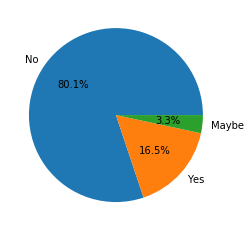

In [28]:
plt.pie(df['mental_health_interview'].value_counts(),labels=df['mental_health_interview'].unique(), autopct='%1.1f%%',)
df['mental_health_interview'].value_counts()

### phys_health_interview
---

Maybe    556
No       497
Yes      201
Name: phys_health_interview, dtype: int64

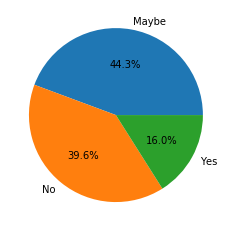

In [29]:
plt.pie(df['phys_health_interview'].value_counts(),labels=df['phys_health_interview'].unique(), autopct='%1.1f%%',)
df['phys_health_interview'].value_counts()

### Preprocessing 
---

In [30]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [31]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,NaN
1,44,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,NaN
2,32,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,NaN
3,31,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,NaN
4,31,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,NaN


### correlation matrix
---
- heatmap to see correlation of various features with the target variable.

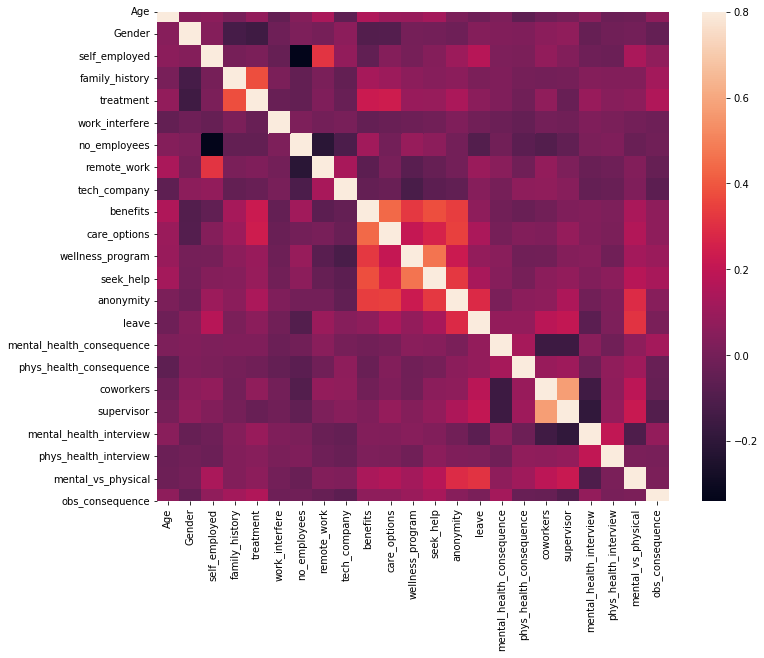

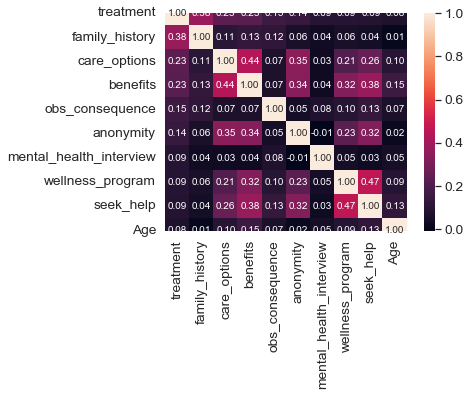

In [32]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()


k = 10 
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Feature engineering:
---

In [33]:
# Scaling Age
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0.477612,0,0,0,1,1,4,0,1,2,...,2,1,1,1,2,1,0,2,0,NaN
1,0.582090,1,0,0,0,2,5,0,0,0,...,0,0,1,0,0,1,1,0,0,NaN
2,0.402985,1,0,0,0,2,4,0,1,1,...,1,1,1,2,2,2,2,1,0,NaN
3,0.388060,1,0,1,1,1,2,0,1,1,...,1,2,2,1,0,0,0,1,1,NaN
4,0.388060,1,0,0,0,0,1,1,1,2,...,0,1,1,1,2,2,2,0,0,NaN


In [34]:
from sklearn.model_selection import train_test_split
X = df.drop(['treatment','comments'], axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size = 0.3,random_state = 101)

In [35]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), 
         KNeighborsClassifier(n_neighbors = 2, weights ='uniform'),
         DecisionTreeClassifier(random_state=10),
         RandomForestClassifier(n_estimators=60, random_state=0), 
         GradientBoostingClassifier(random_state=20), 
         AdaBoostClassifier(), 
         xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))

In [36]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,":",acc)

LogisticRegression : 0.6870026525198939
KNeighborsClassifier : 0.6445623342175066
DecisionTreeClassifier : 0.76657824933687
RandomForestClassifier : 0.8037135278514589
GradientBoostingClassifier : 0.8143236074270557
AdaBoostClassifier : 0.8116710875331565
[21:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier : 0.7798408488063661


Text(28.5, 0.5, 'Actual')

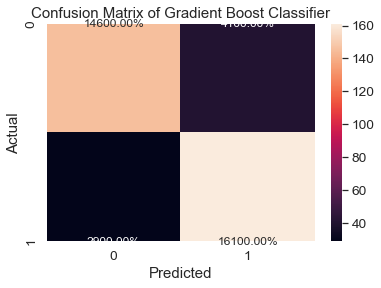

In [47]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix of Gradient Boost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [38]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       187
           1       0.80      0.85      0.82       190

    accuracy                           0.81       377
   macro avg       0.82      0.81      0.81       377
weighted avg       0.82      0.81      0.81       377



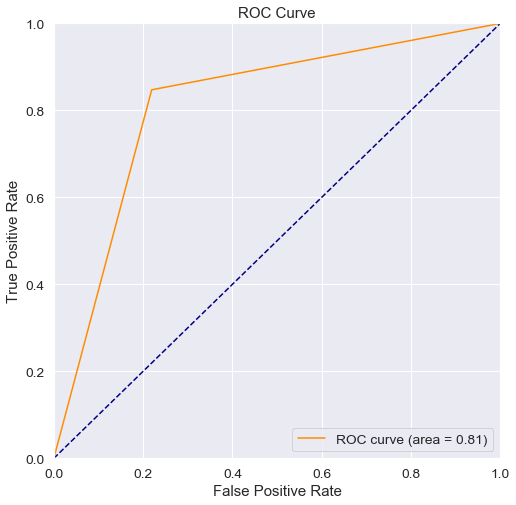

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### wordcloud
---

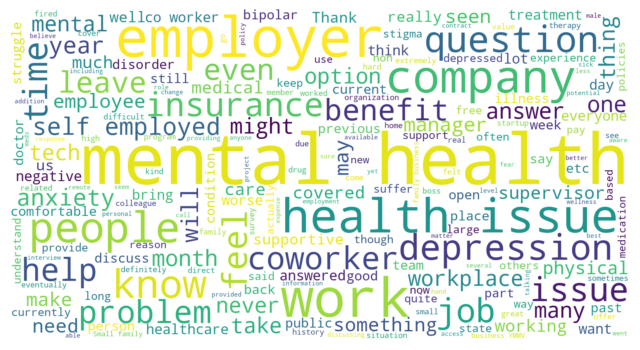

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

words = ''.join(df['comments'].dropna())


plt.figure(figsize=(8,8), dpi=100)
wordcloud = WordCloud(max_words=200,
                       stopwords = STOPWORDS,
                       background_color = "white",
                       contour_color='#023075',
                       contour_width=1,
                       width=1500, height=800).generate(words)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

### Conclusion:
* Cases show that more than 50% of people surveyed in countries like US,Australia and Canada undergo treatment for mental ailments.
* It is interesting to find that people face mental health treatment regardless of whether they are self employed or not.
* Mental health issues affects their productivity at work.
* People don't feel to share about their mental or physical health with employers.
* About 19% of the repondents say YES about becoming a part of the employee wellness program and out of those 60% of employee want to get treatment.
* About 65% of respondents say that there aren't any wellness programs provided by their company. But close to half of those respondents want to get treatment, which means the company needs to fulfil its duty and provide it soon.

In [44]:
#seek = df[df.treatment == 'Yes'].drop(['treatment', 'Country', 'Age'], axis=1)
#dont = df[df.treatment == 'No'].drop(['treatment', 'Country', 'Age'], axis=1)
#seek = df[df.treatment == 'Yes'] 
#dont = df[df.treatment == 'No']

In [1]:
"""
buttons = []
i = 0
vis = [False] * 21

for col in seek.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 21

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in dont.columns:
    fig.add_trace(go.Pie(
             values = dont[col].value_counts(),
             labels = dont[col].value_counts().index,
             title = dict(text = 'No Treatment: <br>Distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)


for col in seek.columns:
    fig.add_trace(go.Pie(
             values = seek[col].value_counts(),
             labels = seek[col].value_counts().index,
             title = dict(text = 'Seek Treatment: <br>Distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('YlGn').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Reds').as_hex(),
                              line=dict(color='#000000', width=1)))
              

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'monospace',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.60,
                        y = 0.95,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.5, y = 1.03, yref = "paper", align = "left")])

for i in range(1,42):
    fig.data[i].visible = False
fig.data[21].visible = True

fig.show()
"""

'\nbuttons = []\ni = 0\nvis = [False] * 21\n\nfor col in seek.columns:\n    vis[i] = True\n    buttons.append({\'label\' : col,\n             \'method\' : \'update\',\n             \'args\'   : [{\'visible\' : vis},\n             {\'title\'  : col}] })\n    i+=1\n    vis = [False] * 21\n\nfig = make_subplots(rows=1, cols=2,\n                    specs=[[{\'type\':\'domain\'}, {\'type\':\'domain\'}]])\n\nfor col in dont.columns:\n    fig.add_trace(go.Pie(\n             values = dont[col].value_counts(),\n             labels = dont[col].value_counts().index,\n             title = dict(text = \'No Treatment: <br>Distribution<br>of {}\'.format(col),\n                          font = dict(size=18, family = \'monospace\'),\n                          ),\n             hole = 0.5,\n             hoverinfo=\'label+percent\',),1,1)\n\n\nfor col in seek.columns:\n    fig.add_trace(go.Pie(\n             values = seek[col].value_counts(),\n             labels = seek[col].value_counts().index,\n       